<a href="https://colab.research.google.com/github/MJ-Moss/MJ-Moss/blob/main/Michael_Moss_FHFA_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Do Self-Employed Borrowers Pay a Higher Mortgage Rate?

by Michael Moss, Thinkful DA Candidate 2021


---



#Summary
This study uses the 2019 datasets from the Federal Housing Finance Agency website, FHLBank Public Use Database, to determine whether there are any discrepancies between loan amounts for borrowers with salaried jobs and loan amounts for those who are self-employed. The data will also be used to further examine if there is any relationship between borrower's employment status and the rate of the loan. I will be using Pandas, Seaborn and other Python libraries to download, analyze, and visualize the data. 



#Value to End User
The results of this study are valuable to both borrowers and lenders; borrowers can determine if they are getting a mortgage of a size and rate consistent with their income and employment status, while lenders can also use this information to decide whether to lower or increase rates or adjust risk criteria based on employment status. 

# Load Data Frame and View Data
To start, I imported the pandas library, loaded up the data frame and viewed the details of the data set. I am using the online location of the .csv file at https://www.fhfa.gov/DataTools. 

In [ ]:
#Placed imports here at start
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("https://www.fhfa.gov/DataTools/Downloads/Documents/FHLBank-PUDB/2019_PUDB_EXPORT_123119.csv")
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89767 entries, 0 to 89766
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             89767 non-null  int64  
 1   LoanCharacteristicsID            89767 non-null  int64  
 2   Bank                             89767 non-null  object 
 3   FIPSStateNumericCode             89767 non-null  int64  
 4   FIPSCountyCode                   89767 non-null  int64  
 5   CoreBasedStatisticalAreaCode     89767 non-null  int64  
 6   CensusTractIdentifier            89767 non-null  float64
 7   CensusTractMinorityRatioPercent  89767 non-null  float64
 8   CensusTractMedFamIncomeAmount    89767 non-null  int64  
 9   LocalAreaMedianIncomeAmount      89767 non-null  int64  
 10  TotalMonthlyIncomeAmount         89767 non-null  int64  
 11  HUDMedianIncomeAmount            89767 non-null  int64  
 12  LoanAcquisitionAct

Fortunately for us this data set was already free of null entries. We can further explore the data with descriptive statistics, and a heatmap of the dataset:

In [ ]:
df.describe()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,LoanAcquisitionActualUPBAmt,LTVRatioPercent,NoteDate,LoanAcquistionDate,LoanPurposeType,ProductCategoryName,MortgageType,ScheduledTotalPaymentCount,LoanAmortizationMaxTermMonths,MortgageLoanSellerInstType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,Borrower2Race1Type,Borrower1GenderType,Borrower2GenderType,Borrower1AgeAtApplicationYears,Borrower2AgeAtApplicationYears,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,HousingExpenseRatioPercent,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PMICoveragePercent,EmploymentBorrowerSelfEmployed,IndexSourceType,MarginRatePercent,Borrower1EthnicityType,Borrower1Race2Type,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
count,89767.0,8.976700e+04,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,8.976700e+04,89767.000000,89767.000000,89767.0,89767.000000,89767.0,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,8.976700e+04,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.0,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.000000,89767.0
mean,2019.0,2.452548e+06,29.874119,89.649270,36172.717569,2681.255339,17.844881,87799.607785,74078.453998,9837.590317,79036.440362,2.438158e+05,74.750979,2018.956198,2019.0,2.743402,1.0,0.076765,333.442256,333.442256,1.020408,1.584034,0.356155,4.915760,6.242461,1.377009,2.760235,44.370392,447.436207,1.028095,1.011619,3.965140,2.440618e+05,20.695734,31.548950,4.393652,6.390121,4.529368,0.385910,99.0,9366.648211,2.044916,6.863045,6.874230,6.874653,6.874676,3.302583,7.347633,7.352880,7.353103,7.353125,2.002974,1.0
std,0.0,2.694902e+04,15.367330,85.719173,23931.023618,3652.664758,18.600936,30551.702748,11949.849407,7843.469558,13119.438254,1.295660e+05,15.130832,0.226514,0.0,2.161045,0.0,0.422898,59.921873,59.921873,0.403550,0.507500,0.478865,0.745901,1.592354,0.585549,1.127613,13.328550,471.482475,0.165245,0.126254,0.511299,1.296468e+05,8.956895,9.561842,0.826616,2.314783,10.000697,0.486812,0.0,2433.738427,0.363468,0.369085,0.332665,0.331147,0.331088,1.479171,0.621057,0.607281,0.606711,0.606661,0.056662,0.0
min,2019.0,2.406119e+06,1.000000,1.000000,10100.000000,1.000000,0.000000,0.000000,0.000000,791.000000,38900.000000,1.280000e+04,5.000000,2014.000000,2019.0,1.000000,1.0,0.000000,60.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.000000,18.000000,1.000000,1.000000,2.500000,1.280000e+04,0.000000,0.270000,1.000000,1.000000,0.000000,0.000000,99.0,0.000000,1.000000,1.000000,2.000000,5.000000,6.000000,1.000000,1.000000,3.000000,5.000000,6.000000,1.000000,1.0
25%,2019.0,2.429908e+06,18.000000,33.000000,19430.000000,102.020000,5.390500,66270.000000,65829.000000,5615.000000,69700.000000,1.480000e+05,68.000000,2019.000000,2019.0,1.000000,1.0,0.000000,360.000000,360.000000,1.000000,1.000000,0.000000,5.000000,5.000000,1.000000,2.000000,34.000000,39.000000,1.000000,1.000000,3.625000,1.480000e+05,14.760000,24.410000,4.000000,5.000000,0.000000,0.000000,99.0,9999.000000,2.000000,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,2.000000,1.0
50%,2019.0,2.452349e+06,27.000000,71.000000,31080.000000,414.090000,11.000000,82019.000000,73493.000000,8333.000000,78000.000000,2.200000e+05,80.000000,2019.000000,2019.0,2.0000

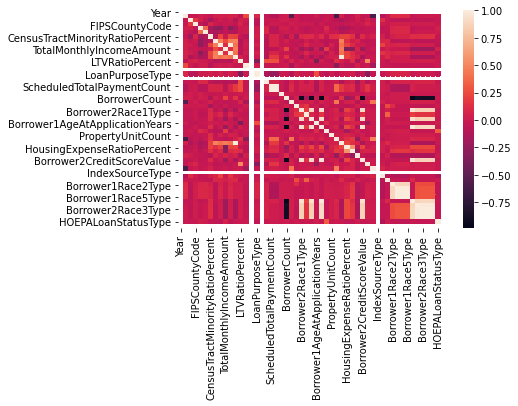

In [ ]:
sns.heatmap(df.corr())

# Hypothesis 1: Employment Status vs. Loan Amount
Here we are going to separate the two groups of employed and self-employed borrowers, and take a look at the mean value of the mortages for each group. We can also retrieve some descriptive stats for our analysis. Employed borrowers are marked as a "0" and self-employed borrowers are marked as a "1" in the "EmploymentBorrowerSelfEmployed" column. We will find the stats for the "Employed" group first.

The null hypothesis in our hypothesis pair 1 is that the mean  mortgage amount (NoteAmount) for employed borrowers is equal to the mean mortgage amount for self-employed borrowers. The alternative hypothesis in hypothesis pair 1 is that the mean mortgage amount for borrowers with a salaried job is not equal to the mean mortgage amount for borrowers who are classified as self-employed. 

Here we start to retrieve data on our first group, employed borrowers. There are 55,125 loans in this group, and the mean loan amount is $243,544:

In [ ]:
borrower_type1=(df['EmploymentBorrowerSelfEmployed']==0) 
employed_note_value=df.iloc[borrower_type1.values, [33]]
employed_note_value.describe().round(0)

,NoteAmount
count,55125.0
mean,243544.0
std,126933.0
min,12800.0
25%,148800.0
50%,220000.0
75%,316000.0
max,1067000.0


We can visualize a histogram for the distribution of the note amounts of the employed borrowers

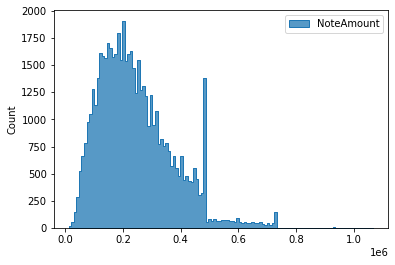

In [ ]:
sns.histplot(employed_note_value, element='step')

Now we find the descriptive statistics for the group of self-employed borrowers. First, we can see that there are a higher number of total loans for employed borrowers: 55,125 (61.4%) vs 34,642 (38.6%). For the purposes of our discussion, we will assume that this reflects or is a close proximation of the actual ratio of employed vs. self-employed in the US labor force in 2019. However, there seems to be an almost neglible difference in the mean:  243,544 vs. 244,885 (0.55%), with the mean self-employed note amount actually being slightly higher. 

In [ ]:
borrower_type2=(df['EmploymentBorrowerSelfEmployed']==1)
self_employed_note_value=df.iloc[borrower_type2.values, [33]]
self_employed_note_value.describe().round(0)


,NoteAmount
count,34642.0
mean,244885.0
std,133849.0
min,16000.0
25%,146217.0
50%,218000.0
75%,318750.0
max,1290000.0


We can make another histogram here to visualize the self-employed borrower distribution, it is quite similar to the histogram above:

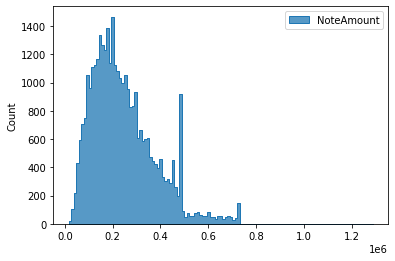

In [ ]:
sns.histplot(self_employed_note_value, element='step')


A difference of approximately $1,341 between the two means is not a huge amount, but is it statistically significant? 

We can make a side-by-side comparison of
 the two groups in the following visualization:

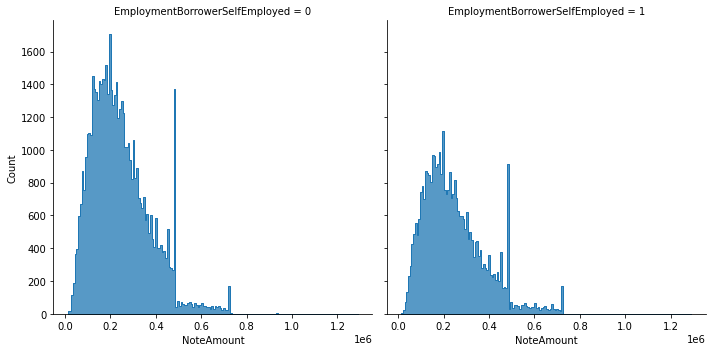

In [ ]:
sns.displot(df,x='NoteAmount',col="EmploymentBorrowerSelfEmployed",element='step')

When we juxtapose the two distributions, it can be seen that the shape is almost identical.

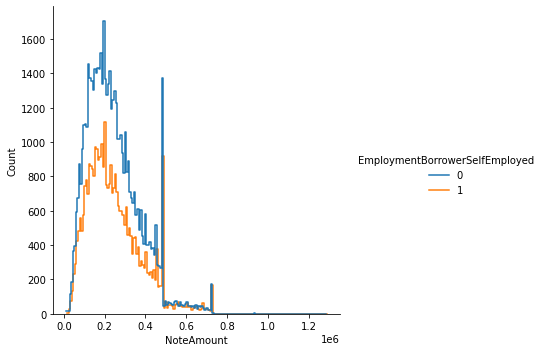

In [ ]:
sns.displot(df,x="NoteAmount",hue="EmploymentBorrowerSelfEmployed",multiple="dodge",element='step',fill=False)

Here is another look at the two groups of home loan borrowers with the lines smoothed, and the similarity is even more apparent:

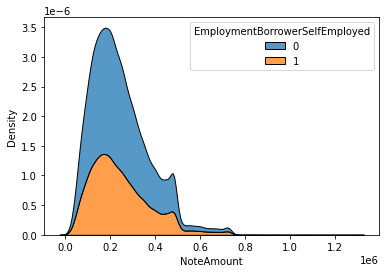

In [ ]:
sns.kdeplot(data=df, x="NoteAmount", hue="EmploymentBorrowerSelfEmployed", multiple="stack")

At this point, it appears that the difference in means is rather minute, but is it statitistically significant? Below we will perform an independent t-test to confirm this fact.  

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind
stats.ttest_ind(employed_note_value, self_employed_note_value)

Ttest_indResult(statistic=array([-1.50835362]), pvalue=array([0.13146757]))

#Conclusion 1
The independent t-test reveals a p-value of 0.131. This is greater than our 0.05 threshold, which means that this difference is not statisically significant. Therefore we fail to reject the null hypothesis that there is no difference between the mean mortgage amount between employed borrowers and self-employed borrowers. To put it another way, there is no significant difference in the loan amounts of employed borrowers vs. the loan amounts of self-employed borrowers. From this comparison, the only preference we can determine is that the issuance of loans for employed borrowers outnumber those for self-employed borrowers on a 5:3 basis.

#Hypothesis 2: Note Rate for Self-Employed vs. Employed

In the previous analysis, we looked for a connection between note amount and employment status. Here we will take our two groups of employed and self-employed borrowers and find the mean mortgage rate for each to check for a relationship 

The null hypothesis in our hypothesis pair 2 is that the mean mortgage rate(NoteRatePercent) for employed borrowers is equal to the mean mortgage rate for self-employed borrowers. The alternative hypothesis in hypothesis pair 2 is that the mean mortgage rate for borrowers with a salaried job is not equal to the mean mortgage rate for borrowers who are classified as self-employed. 

As for our previous query, we will begin by finding the descriptive statistics for the employed borrower group. We find a mean rate of 3.77 per cent:

In [ ]:
employed_rate=df.iloc[borrower_type1.values, [32]]
employed_rate.describe()

,NoteRatePercent
count,55125.000000
mean,3.773743
std,0.419236
min,2.500000
25%,3.500000
50%,3.750000
75%,4.000000
max,6.250000


We can visualize the distribution of the note rate for employed borrowers: 

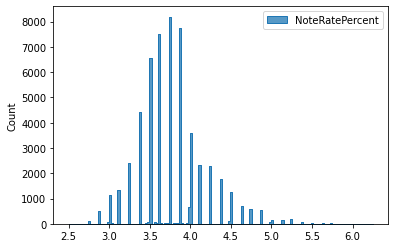

In [ ]:
sns.histplot(employed_rate, element='step')

Now we find the descriptive statistics for the self-employed note rates. The mean rate is 4.26 per cent, which is higher than for employed borrowers:

In [ ]:
self_rate=df.iloc[borrower_type2.values,[32]]
self_rate.describe()

,NoteRatePercent
count,34642.000000
mean,4.269706
std,0.496690
min,2.750000
25%,3.990000
50%,4.250000
75%,4.625000
max,6.125000


Here is a visualization of the distribution of the self employed note rates:

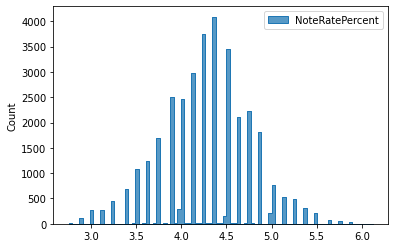

In [ ]:
sns.histplot(self_rate, element='step')

When the two plots are juxtaposed, the orange, or self-employed note rate, appears to be solidly to the right of (higher than) the blue, representing the employed note rate. This trend is noticeable in both of the below charts:

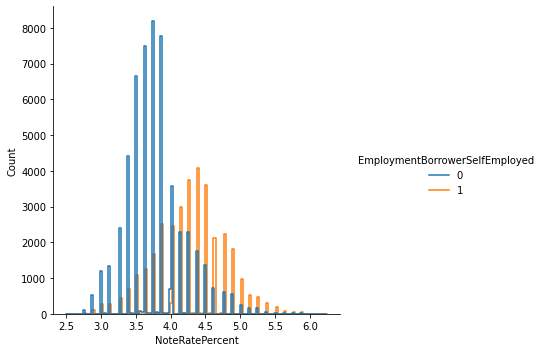

In [ ]:
sns.displot(df,x="NoteRatePercent",hue="EmploymentBorrowerSelfEmployed",multiple="dodge",element='step',fill=False)

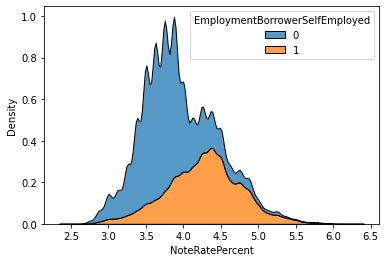

In [ ]:
sns.kdeplot(data=df, x="NoteRatePercent", hue="EmploymentBorrowerSelfEmployed", multiple="stack")

The chart below was made in a "scatterplot" grid, the density of the marks shows the frequency of the distribution. It is also clear in this graph from the thick cluster of orange on the right that the self-employed rate is higher than the employed rate. 

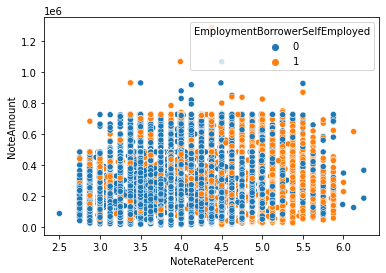

In [ ]:
sns.scatterplot(data=df,x="NoteRatePercent",y="NoteAmount",hue="EmploymentBorrowerSelfEmployed")

Finally, we can combine all of the previous analysis into the chart below. In the center of the chart, we can see the distribution of the note rate, clearly skewing higher for the self-employed borrower group. This relationship is also shown at the top of the scatterplot along the x-axis. The nearly identical curves along the y-axis represent the familiar distributions of the note amount for employed and self-employed borrowers. This near-perfect parity also acounts for the rectangular shape of the scatterplot.

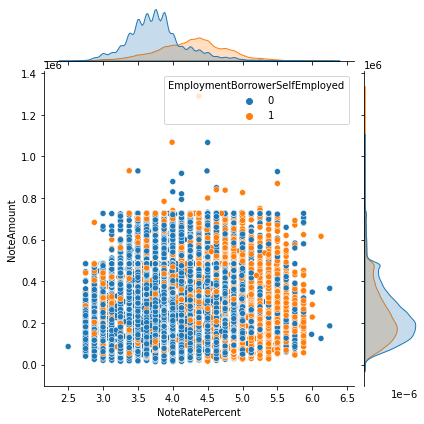

In [ ]:
sns.jointplot(data=df, x="NoteRatePercent", y="NoteAmount", hue="EmploymentBorrowerSelfEmployed")

We can run an independent t-test to find the p-value and see if the difference in the mean note rate between employed and unemployed borrowers is significant:

In [ ]:
stats.ttest_ind(employed_rate, self_rate)

Ttest_indResult(statistic=array([-160.4993735]), pvalue=array([0.]))

The difference is statistically significant! I then peformed the function to find the 95% confidence interval (two-tail) for the difference in the means between the two groups:

In [ ]:
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
get_95_ci(employed_rate, self_rate)

'The difference in means at the 95% confidence interval (two-tail) is between NoteRatePercent    0.489669\ndtype: float64 and NoteRatePercent    0.502256\ndtype: float64.'

#Conclusion 2 
At less than 0.0001, the p-value shows that the difference in the note rate between employed borrowers and self-employed borrowers is statistically significant. We can reject the null hypothesis that there is no difference betwen the note rates for employed and self-employed borrowers, and accept the alternative hypothesis that there is in fact a significant difference in the mean rates between the two groups. *In other words, self-employed borrowers are receiving their mortgages at higher rates than their employed counterparts.*

# Conclusion of Study
Although the mean note amount of loans for employed and self-employed borrowers is almost identical, the mortgage rate paid by self-employed borrowers is higher 4.269 vs. 3.773, almost half a percentage point more 49.6%. 

#Recommendations
For borrowers, the takeaway for me is that having a salaried job will put you in a much better position to secure a mortgage loan with a lower rate. Obviously, self-employed borrowers can still receive mortgage loans, but being an employed borrower will save thousands of dollars over the life of a 15-30 year loan.
However, with the massive shift in recent years to the so-called "gig-economy," it is not feasible for a significant percentage of the workforce to work at or even find traditional jobs that banks consider to be less risk in terms of loans. Therefore, for the lenders and policy-makers, the data from this study could be used to adjust either mortgage rates themselves, or to craft a more accurate risk profile for self-employed borrowers, to make home loans, and thereby home ownership, more accesible for today's workers.